- 분류모델 해보기
- 정규분포로 스케일링 -> 클러스터링 해보기

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import glob

import warnings
warnings.filterwarnings(action='ignore')

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

## 데이터 준비

In [2]:
yp_21 = pd.read_excel('pre_yp2021_중요도.xlsx')
yp_21.head()

,SAMPID,희망지역_A,희망지역_C,BIRTHY,성별,거주지,경제활동상태,최종학력,학교소재지,학교유형,...,경제적보상_Cc,인정_Cc,신체활동_Cc,직업안정_Cc,다양성_Cc,심신의안녕_Cc,타인영향_Cc,지적추구_Cc,애국_Cc,자율_Cc
0,100001,서울,0,2000,남성,서울특별시,비경제활동인구,고졸,서울,대학교,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,서울,0,2002,남성,서울특별시,비경제활동인구,고졸,서울,대학교,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,상관없음,상관없음,1998,남성,서울특별시,비경제활동인구,대졸,대구,대학교,...,4.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,4.0,4.0
3,100004,수도권,0,1996,남성,서울특별시,취업자,대졸,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,서울,서울,1998,여성,서울특별시,비경제활동인구,고졸,서울,대학교,...,3.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,3.0


In [3]:
yp_21.columns

Index(['SAMPID', '희망지역_A', '희망지역_C', 'BIRTHY', '성별', '거주지', '경제활동상태', '최종학력',
       '학교소재지', '학교유형', '세부학교유형', '성취_A', '이타_A', '개인지향_A', '경제적보상_A', '인정_A',
       '신체활동_A', '직업안정_A', '다양성_A', '심신의안녕_A', '타인영향_A', '지적추구_A', '애국_A',
       '자율_A', '성취_Ca', '이타_Ca', '개인지향_Ca', '경제적보상_Ca', '인정_Ca', '신체활동_Ca',
       '직업안정_Ca', '다양성_Ca', '심신의안녕_Ca', '타인영향_Ca', '지적추구_Ca', '애국_Ca', '자율_Ca',
       '성취_Cc', '이타_Cc', '개인지향_Cc', '경제적보상_Cc', '인정_Cc', '신체활동_Cc', '직업안정_Cc',
       '다양성_Cc', '심신의안녕_Cc', '타인영향_Cc', '지적추구_Cc', '애국_Cc', '자율_Cc'],
      dtype='object')

In [4]:
drop_index = yp_21[yp_21['성취_A'].isnull()==True].index
yp_21 = yp_21.drop(index=drop_index).reset_index(drop=True)

In [5]:
col = ['SAMPID', '희망지역_A', '성별', '거주지', '최종학력','학교소재지', '학교유형',
       '성취_A', '이타_A', '개인지향_A', '경제적보상_A', '인정_A', '신체활동_A', '직업안정_A', 
       '다양성_A', '심신의안녕_A', '타인영향_A', '지적추구_A', '애국_A', '자율_A']

In [6]:
yp_21[col].to_excel('cluster.xlsx', index=False)

### 전체 데이터 MERGE

In [305]:
df1 = pd.read_excel('pre_yp2021_중요도.xlsx')
df2 = pd.read_excel('pre_yp2021_희망_고려사항.xlsx')
df3 = pd.read_excel('pre_yp2021_노력_경로_어려움.xlsx')
df4 = pd.read_excel('yp2021_wage.xlsx')

In [306]:
df = pd.merge(df1, df2[['SAMPID', '희망직업_A', '희망직업_선택이유_A', '희망산업_A', '희망산업_선택이유_A', 
                        '희망기업_A', '희망기업_선택이유_A', '일자리택_고려사항',
                        '희망직업_C', '희망직업_선택이유_C', '희망산업_C', '희망산업_선택이유_C',
                        '희망기업_C', '희망기업_선택이유_C']], 
             on='SAMPID')

In [307]:
df = pd.merge(df, df3[['SAMPID', '취업노력_A', '취업노력_C',
                       '구직정보_취득경로_1순위_A', '구직정보_취득경로_2순위_A', '구직정보_취득경로_3순위_A', 
                       '구직정보_취득경로_1순위_C', '구직정보_취득경로_2순위_C', '구직정보_취득경로_3순위_C',
                       '구직시_어려움_1순위_A', '구직시_어려움_1순위_C']], 
              on='SAMPID')

In [308]:
df = pd.merge(df, df4[['SAMPID', '유보임금']], on='SAMPID')

In [310]:
df.to_excel('yp21_all_data_AC.xlsx', index=False)

- NULL 제거

In [ ]:
drop_index = df[df['성취_A'].isnull()==True].index
df = df.drop(index=drop_index).reset_index(drop=True)

In [ ]:
df.to_excel('yp21_all_data_nNL.xlsx', index=False)

# 1. 클러스터링

In [483]:
# yp = pd.read_excel('yp21_all_data_AC.xlsx')

In [489]:
# yp.columns

In [488]:
# dd = yp[['SAMPID', '희망지역_A', 'BIRTHY', '성별', '거주지', '경제활동상태', '최종학력',
#          '학교소재지', '학교유형', '세부학교유형', '성취_A', '이타_A', '개인지향_A', '경제적보상_A', 
#          '인정_A', '신체활동_A', '직업안정_A', '다양성_A', '심신의안녕_A', '타인영향_A', '지적추구_A', 
#          '애국_A', '자율_A', '희망직업_A', '유보임금', '희망산업_A', '희망산업_선택이유_A', 
#          '희망기업_A', '희망기업_선택이유_A', '일자리택_고려사항', '취업노력_A']]
# drop_index = dd[dd['희망지역_A']==0].index
# dd = dd.drop(index=drop_index).reset_index(drop=True)
# dd.to_excel('yp_all_wage.xlsx', index=False)

In [485]:
# yp[['SAMPID', '희망지역_A', 'BIRTHY', '성별', '거주지', '최종학력','학교소재지', '학교유형', '세부학교유형', 
#     '유보임금', '성취_A', '이타_A', '개인지향_A', '경제적보상_A', '인정_A', '신체활동_A', 
#     '직업안정_A', '다양성_A', '심신의안녕_A', '타인영향_A', '지적추구_A', '애국_A', '자율_A', 
#     '희망산업_A', '희망기업_A',  '일자리택_고려사항']].to_excel('cluster_df.xlsx', index=False)

### 데이터 준비

In [2]:
yp = pd.read_excel('yp_all_wage_1.xlsx')
# yp = pd.read_excel('cluster.xlsx')
yp.head(2)

,SAMPID,희망지역,BIRTHY,성별,거주지,경제활동상태,최종학력,학교소재지,학교유형,세부학교유형,...,애국,자율,희망직업,유보임금,희망산업,희망산업_선택이유,희망기업,희망기업_선택이유,일자리택_고려사항,취업노력
0,100001,서울,2000,남성,서울특별시,비경제활동인구,고졸,서울,대학교,일반 4년제 대학,...,3,4,0,4000,금융 및 보험업,보수가 많을 것 같아서,대기업,기업의 대외 이미지가 좋을 것 같아서,높은 임금,0
1,100002,서울,2002,남성,서울특별시,비경제활동인구,고졸,서울,대학교,일반 4년제 대학,...,5,5,보건/의료직,4500,보건 및 사회복지 사업,근무환경이 좋을 것 같아서,공공기관,작업환경 등 근무 환경이 양호할 것 같아서,공정한 보상,0


In [3]:
yp['학교소재지'] = ['무응답' if yp['학교소재지'][i]==0 else yp['학교소재지'][i] for i in range(len(yp))]
yp['학교유형'] = ['무응답' if yp['학교유형'][i]==0 else yp['학교유형'][i] for i in range(len(yp))]
yp['최종학력'] = ['무응답' if yp['최종학력'][i]==0 else yp['최종학력'][i] for i in range(len(yp))]

In [4]:
# drop_index = yp[yp['희망지역_A']==0].index
# yp = yp.drop(index=drop_index).reset_index(drop=True)

In [5]:
print(len(yp))
yp.head(2)

10721


,SAMPID,희망지역,BIRTHY,성별,거주지,경제활동상태,최종학력,학교소재지,학교유형,세부학교유형,...,애국,자율,희망직업,유보임금,희망산업,희망산업_선택이유,희망기업,희망기업_선택이유,일자리택_고려사항,취업노력
0,100001,서울,2000,남성,서울특별시,비경제활동인구,고졸,서울,대학교,일반 4년제 대학,...,3,4,0,4000,금융 및 보험업,보수가 많을 것 같아서,대기업,기업의 대외 이미지가 좋을 것 같아서,높은 임금,0
1,100002,서울,2002,남성,서울특별시,비경제활동인구,고졸,서울,대학교,일반 4년제 대학,...,5,5,보건/의료직,4500,보건 및 사회복지 사업,근무환경이 좋을 것 같아서,공공기관,작업환경 등 근무 환경이 양호할 것 같아서,공정한 보상,0


In [6]:
yp['거주지'].value_counts()

경기도        2631
서울특별시      2139
부산광역시       711
인천광역시       664
경상남도        560
대구광역시       543
경상북도        432
충청남도        412
대전광역시       399
광주광역시       366
충청북도        361
전라북도        347
강원도         311
전라남도        309
울산광역시       270
제주특별자치도     172
세종특별자치시      94
Name: 거주지, dtype: int64

In [7]:
# 거주지가 경기도, 서울특별시, 부산광역시인 경우 각각 500개씩 샘플링
sample_gyeonggi = yp[yp['거주지'] == '경기도'].sample(n=500, random_state=42)
sample_seoul = yp[yp['거주지'] == '서울특별시'].sample(n=500, random_state=42)
sample_inc = yp[yp['거주지'] == '인천광역시'].sample(n=500, random_state=42)
sample_busan = yp[yp['거주지'] == '부산광역시'].sample(n=500, random_state=42)

# 거주지가 경기도, 서울특별시, 부산광역시가 아닌 경우의 데이터 전체 선택
other_regions = yp[~yp['거주지'].isin(['경기도', '서울특별시', '인천광역시', '부산광역시'])]

# 샘플링한 데이터프레임과 다른 지역 데이터를 합쳐서 새로운 데이터프레임 생성
sampled_df = pd.concat([sample_gyeonggi, sample_seoul, sample_inc, sample_busan, other_regions])
sampled_df.reset_index(inplace=True, drop=True)
sampled_df.head()
print(len(sampled_df))

6576


In [8]:
sampled_df['거주지'].value_counts()

경상남도       560
대구광역시      543
경기도        500
인천광역시      500
부산광역시      500
서울특별시      500
경상북도       432
충청남도       412
대전광역시      399
광주광역시      366
충청북도       361
전라북도       347
강원도        311
전라남도       309
울산광역시      270
제주특별자치도    172
세종특별자치시     94
Name: 거주지, dtype: int64

In [9]:
# 수치형 변수 선택
num_features = ["성취", "이타", "인정", "신체활동", "직업안정", 
                "다양성", "타인영향", "지적추구", "애국",
                "경제적보상", "심신의안녕", "자율"
               ]
yp_num = sampled_df[num_features]

# 각 행별 정규화 적용
normalized_data = yp_num[num_features].apply(lambda row: (row - row.mean()) / row.std(), axis=1)

for col in num_features:
    yp_num[col] = normalized_data[col]

# 선택한 컬럼만 정규화
scaler = StandardScaler()
yp_num['유보임금'] = scaler.fit_transform(sampled_df[['유보임금']])

# 범주형 변수 변환
cat_features = ["희망지역", "거주지", "최종학력"]
encoder = OneHotEncoder(sparse=False)
yp_cat_encoded = encoder.fit_transform(sampled_df[cat_features])

In [10]:
em_col = []
em_col.extend(list(encoder.categories_[0]))
em_col.extend(list(encoder.categories_[1]))
em_col.extend(list(encoder.categories_[2]))

In [11]:
yp_cat_df = pd.DataFrame(data=yp_cat_encoded, columns=em_col)
yp_cat_df.head()

,상관없음,서울,수도권,지방 광역시,지방 중소도시,강원도,경기도,경상남도,경상북도,광주광역시,...,전라남도,전라북도,제주특별자치도,충청남도,충청북도,고졸,고졸미만,대졸,석사학위이상,전문대졸
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
drop_index = yp_num[yp_num['성취'].isnull()==True].index
yp_num = yp_num.drop(index=drop_index).reset_index(drop=True)
yp_cat_df = yp_cat_df.drop(index=drop_index).reset_index(drop=True)
yp_df = sampled_df.drop(index=drop_index).reset_index(drop=True)

In [13]:
# 3. 수치형 변수와 범주형 변환 변수 결합
yp_combined = pd.concat([yp_num, yp_cat_df], axis=1)
print(len(yp_combined))
yp_combined.head()

6368


,성취,이타,인정,신체활동,직업안정,다양성,타인영향,지적추구,애국,경제적보상,...,전라남도,전라북도,제주특별자치도,충청남도,충청북도,고졸,고졸미만,대졸,석사학위이상,전문대졸
0,0.511766,2.047065,-1.023533,0.511766,-1.023533,0.511766,-1.023533,-1.023533,-1.023533,0.511766,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.712698,0.428174,0.428174,-0.856349,0.428174,0.428174,-0.856349,0.428174,0.428174,-0.856349,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.402200,-1.206599,0.402200,-1.206599,0.402200,0.402200,0.402200,0.402200,0.402200,2.010999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.809174,-0.809174,1.132843,-0.809174,1.132843,-0.809174,1.132843,-0.809174,-0.809174,-0.809174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.443376,0.288675,1.443376,-0.866025,-0.866025,-0.866025,0.288675,1.443376,-0.866025,-0.866025,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
yp_combined.columns

Index(['성취', '이타', '인정', '신체활동', '직업안정', '다양성', '타인영향', '지적추구', '애국', '경제적보상',
       '심신의안녕', '자율', '유보임금', '상관없음', '서울', '수도권', '지방 광역시', '지방 중소도시', '강원도',
       '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시',
       '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '고졸', '고졸미만', '대졸', '석사학위이상', '전문대졸'],
      dtype='object')

In [15]:
col_list = ['성취', '이타', '인정', '신체활동', 
            '직업안정', '다양성', '타인영향', '지적추구',
            '애국', 
#             '경제적보상_A', '심신의안녕_A', '자율_A', 
            '유보임금',
            
            '상관없음', '서울', '수도권', '지방 광역시', '지방 중소도시', 
            
            '강원도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
            '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
            '제주특별자치도', '충청남도', '충청북도', 
#             '서울특별시', '경기도', '인천광역시', 
            
            '고졸', '고졸미만', '대졸', '석사학위이상', '전문대졸'
           ]

In [16]:
k_df = yp_combined[col_list]
k_df.head(2)

,성취,이타,인정,신체활동,직업안정,다양성,타인영향,지적추구,애국,유보임금,...,전라남도,전라북도,제주특별자치도,충청남도,충청북도,고졸,고졸미만,대졸,석사학위이상,전문대졸
0,0.511766,2.047065,-1.023533,0.511766,-1.023533,0.511766,-1.023533,-1.023533,-1.023533,-0.402536,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.712698,0.428174,0.428174,-0.856349,0.428174,0.428174,-0.856349,0.428174,0.428174,1.014841,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


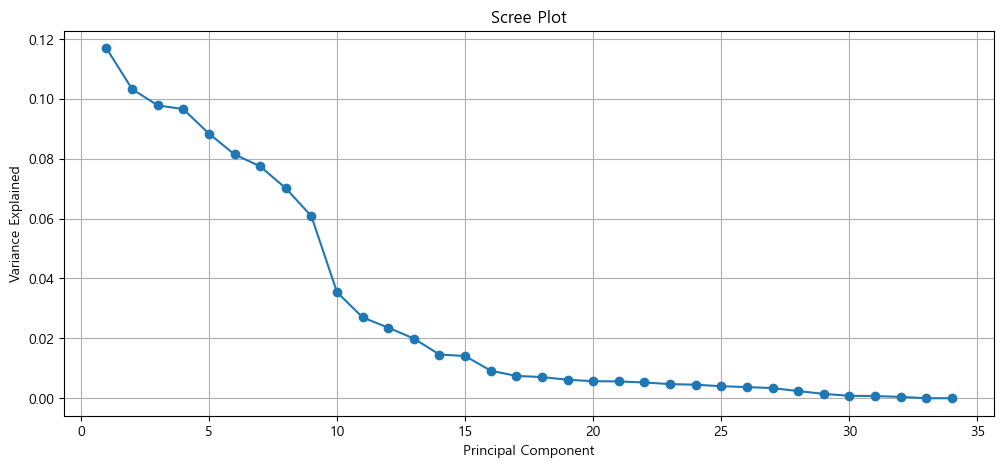

In [17]:
from sklearn.decomposition import PCA

# 2. PCA 분석 수행
pca = PCA()
pca.fit(k_df)

# 3. Scree Plot 그리기
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [18]:
# PCA 분석 - 주성분을 5개로 설정
num=5
pca = PCA(n_components=num)
pca_result = pca.fit_transform(k_df)

# PCA 결과를 데이터프레임으로 저장 (주성분 1~5까지)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(num)])

# 결과 출력
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum())
print(pca_df.head())

Explained Variance Ratio: [0.11690579 0.10326714 0.09782941 0.09656264 0.08838682]
Cumulative Explained Variance: [0.11690579 0.22017293 0.31800233 0.41456497 0.50295179]
        PC1       PC2       PC3       PC4       PC5
0  2.163909 -1.497548 -0.698928 -1.133995  0.428246
1  0.891763  0.179626  1.058426  0.969471  0.433065
2 -0.218193  0.536040  1.525069  0.636777 -0.536547
3 -0.788941  0.733652 -0.128733  0.639963 -0.320695
4  0.724115  2.275960  0.317347  0.066716  0.102325


### 클러스터링

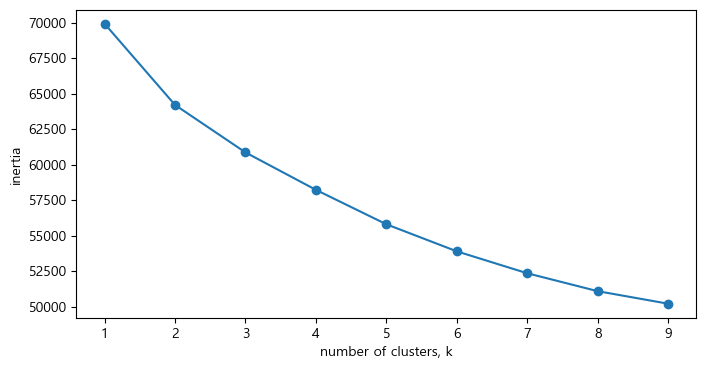

In [46]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(k_df)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(8, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

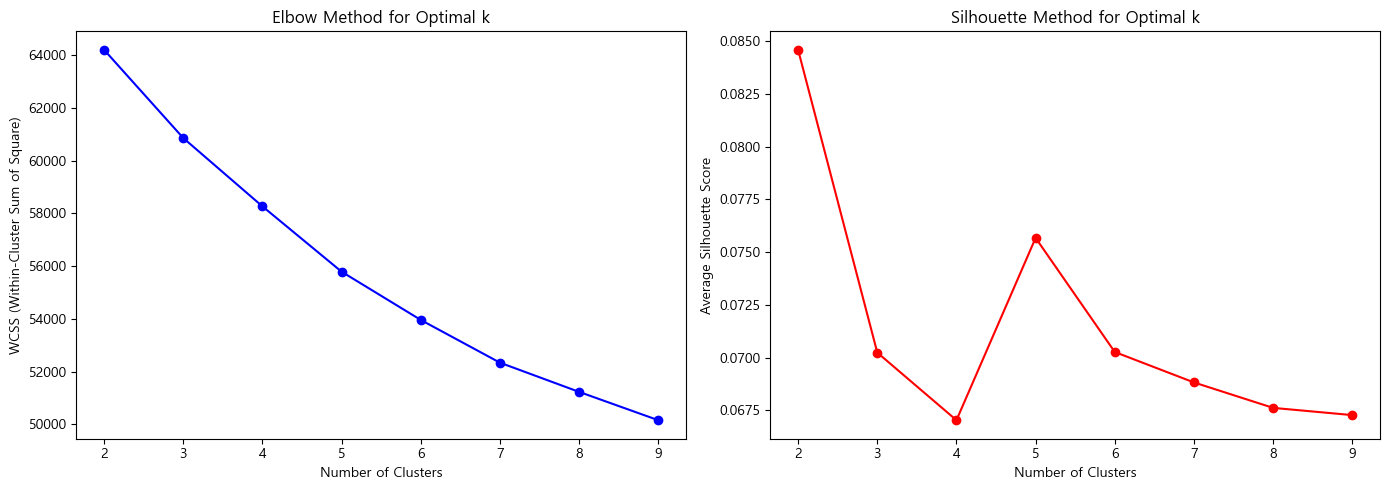

In [48]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

cluster_range = range(2,10)
wcss = []  # 엘보우 방법에 사용할 WCSS 저장 리스트
silhouette_avg = []  # 실루엣 방법에 사용할 실루엣 계수 저장 리스트

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(k_df)
    wcss.append(kmeans.inertia_)  # WCSS 계산
    silhouette_avg.append(silhouette_score(k_df, kmeans.labels_))  # 실루엣 계수 계산

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 엘보우 방법 시각화
ax1.plot(cluster_range, wcss, 'bo-', color='blue')
ax1.set_title('Elbow Method for Optimal k')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS (Within-Cluster Sum of Square)')

# 실루엣 방법 시각화
ax2.plot(cluster_range, silhouette_avg, 'bo-', color='red')
ax2.set_title('Silhouette Method for Optimal k')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Average Silhouette Score')

# plt.figure(figsize=(8, 4))
# plt.plot(cluster_range, wcss, 'bo-', color='blue')
# plt.plot(cluster_range, silhouette_avg, 'bo-', color='red')

plt.tight_layout()
plt.show()

In [1]:
# !pip install kmedoids

In [50]:
# import kmedoids

# # K-medoids 모델 생성
# kmedoids = KMedoids(n_clusters=4, random_state=42)
# kmedoids.fit(k_df)

# # 결과 시각화
# plt.scatter(k_df[:, 0], k_df[:, 1], c=kmedoids.labels_, cmap='viridis')
# plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], c='red', marker='X', s=200)
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("K-Medoids Clustering")
# plt.show()

In [51]:
# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = num # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                     , random_state = 42
                     , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(k_df) # unsupervised learning

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(k_df) # 각 예측군집

print(pred[:10])
pd.DataFrame(centers)

[4 4 3 3 2 0 3 3 3 3]


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.324873,-0.173039,0.311247,-0.108198,0.142806,-0.253636,-0.132417,-0.041694,-0.906354,2.269484,...,0.110476,0.070476,0.040000,-2.775558e-17,0.032381,0.571429,0.003810,0.325714,0.011429,0.087619
1,0.114180,0.703100,0.306007,0.077087,0.186145,-1.326513,0.072439,-0.034274,-0.388987,-0.221894,...,0.039494,0.055292,0.043444,5.687204e-02,0.076619,0.571090,0.004739,0.296209,0.007109,0.120853
2,0.295688,-0.600409,0.522388,0.120275,-0.877161,0.103526,0.168897,-0.041058,-0.399073,-0.204484,...,0.021837,0.040663,0.012801,9.036145e-02,0.064006,0.603163,0.003765,0.262801,0.008283,0.121988
3,0.219019,-1.063497,0.196948,0.055599,0.995870,-0.218905,-0.172860,-0.102793,-0.783800,-0.254959,...,0.058940,0.046558,0.025755,5.844477e-02,0.030213,0.587420,0.005448,0.255077,0.004953,0.147103
4,0.028640,0.744867,-0.381280,-0.726783,0.318953,0.619619,-0.309644,-0.145717,-0.183361,-0.117874,...,0.030081,0.054472,0.014634,7.967480e-02,0.080488,0.591870,0.003252,0.282114,0.002439,0.120325


In [52]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = k_df.copy()
clust_df['clust'] = pred
clust_df.head()

,성취,이타,인정,신체활동,직업안정,다양성,타인영향,지적추구,애국,유보임금,...,전라북도,제주특별자치도,충청남도,충청북도,고졸,고졸미만,대졸,석사학위이상,전문대졸,clust
0,0.511766,2.047065,-1.023533,0.511766,-1.023533,0.511766,-1.023533,-1.023533,-1.023533,-0.402536,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,1.712698,0.428174,0.428174,-0.856349,0.428174,0.428174,-0.856349,0.428174,0.428174,1.014841,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2,0.402200,-1.206599,0.402200,-1.206599,0.402200,0.402200,0.402200,0.402200,0.402200,0.258906,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
3,-0.809174,-0.809174,1.132843,-0.809174,1.132843,-0.809174,1.132843,-0.809174,-0.809174,-0.166307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,1.443376,0.288675,1.443376,-0.866025,-0.866025,-0.866025,0.288675,1.443376,-0.866025,0.542382,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


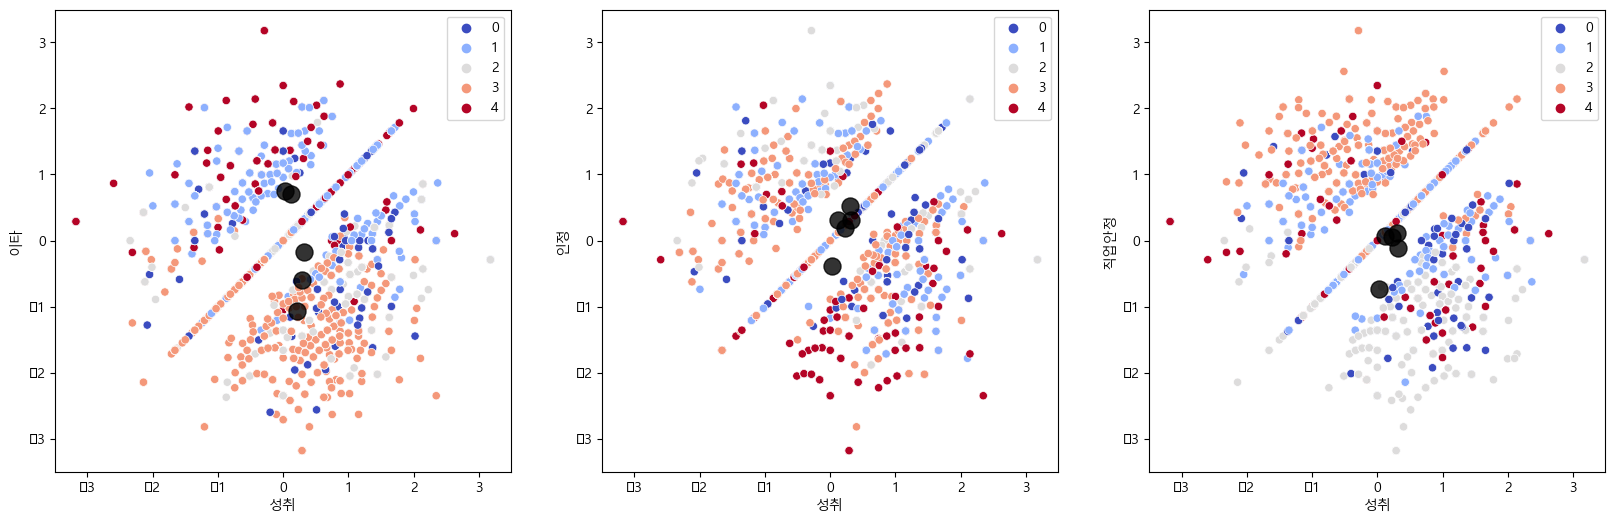

In [53]:
plt.figure(figsize=(20, 6))

X = clust_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=k_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=k_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,4], data=k_df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)

plt.show()

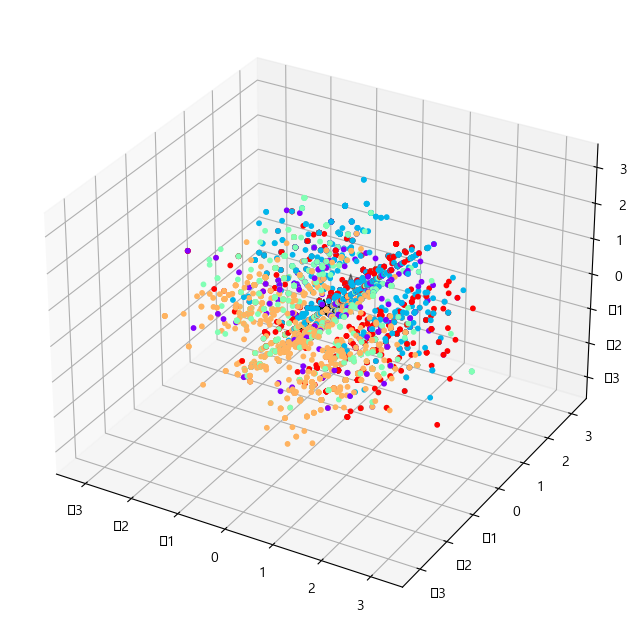

In [54]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
plt.show()

In [55]:
# 2차원 평면에 그리기 위해 PCA로 2개로 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_transformed = pca.fit_transform(clust_df)

clust_df['pca_x'] = pca_transformed[:,0]
clust_df['pca_y'] = pca_transformed[:,1]

# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = clust_df[clust_df['clust']==0].index
marker1_ind = clust_df[clust_df['clust']==1].index
marker2_ind = clust_df[clust_df['clust']==2].index
marker3_ind = clust_df[clust_df['clust']==3].index
marker4_ind = clust_df[clust_df['clust']==4].index

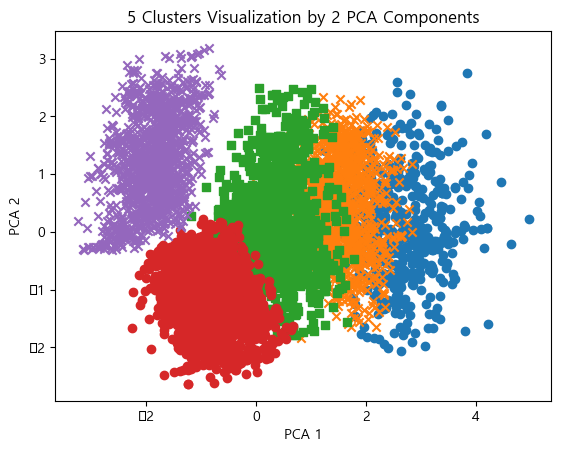

In [56]:
plt.scatter(x=clust_df.loc[marker0_ind,'pca_x'], y=clust_df.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=clust_df.loc[marker1_ind,'pca_x'], y=clust_df.loc[marker1_ind,'pca_y'], marker='x')
plt.scatter(x=clust_df.loc[marker2_ind,'pca_x'], y=clust_df.loc[marker2_ind,'pca_y'], marker='s')
plt.scatter(x=clust_df.loc[marker3_ind,'pca_x'], y=clust_df.loc[marker3_ind,'pca_y'], marker='o')
plt.scatter(x=clust_df.loc[marker4_ind,'pca_x'], y=clust_df.loc[marker4_ind,'pca_y'], marker='x')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('5 Clusters Visualization by 2 PCA Components')
plt.show()

### 결과 분석

In [ ]:
sampled_df['cluster'] = clust_df['clust']

In [ ]:
sampled_df.head(1)

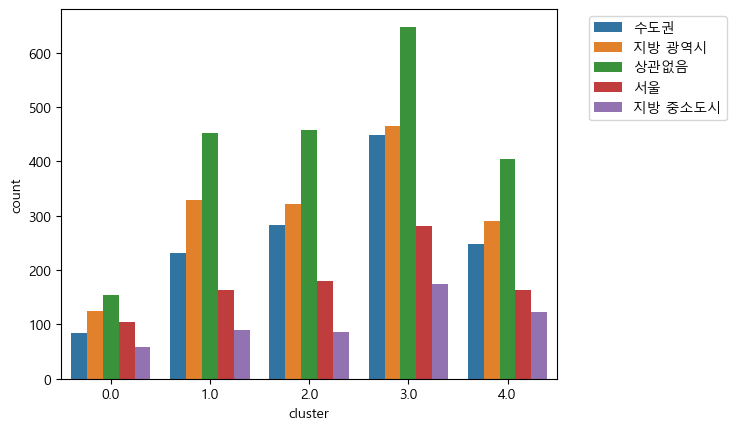

In [60]:
sns.countplot(data=sampled_df, x='cluster', hue='희망지역')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

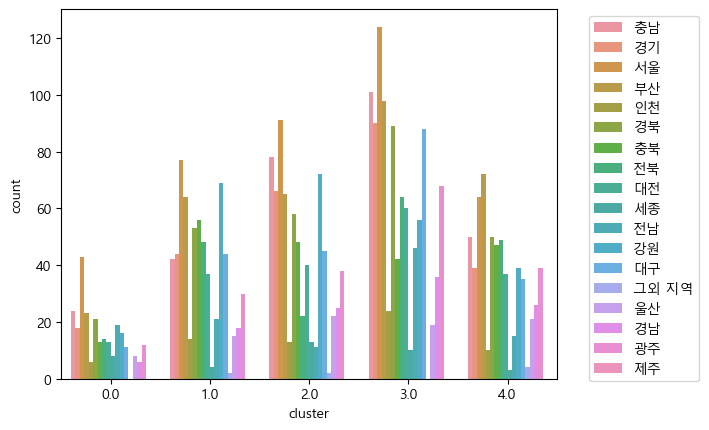

In [61]:
sns.countplot(data=sampled_df[~sampled_df['학교소재지'].isin(['무응답'])], x='cluster', hue='학교소재지')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

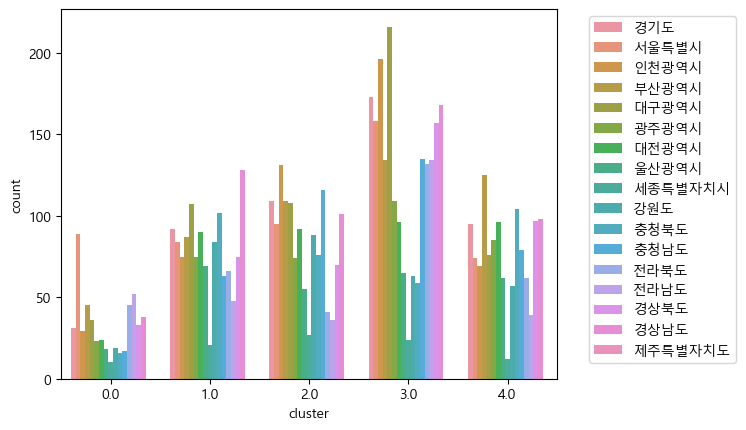

In [62]:
sns.countplot(data=sampled_df, x='cluster', hue='거주지')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. 분류모델

## (1) 데이터 준비

In [2]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_excel('yp_all_wage_1.xlsx')
# df = pd.read_excel('yp21_all_data_AC.xlsx')
# df = pd.read_excel('yp21_all_data_nNL.xlsx')

In [5]:
df['학교소재지'] = [0 if df['학교소재지'][i]==0 else df['학교소재지'][i] for i in range(len(df))]
df['학교유형'] = [0 if df['학교유형'][i]==0 else df['학교유형'][i] for i in range(len(df))]

In [6]:
df.columns

Index(['SAMPID', '희망지역', 'BIRTHY', '성별', '거주지', '경제활동상태', '최종학력', '학교소재지',
       '학교유형', '세부학교유형', '성취', '이타', '개인지향', '경제적보상', '인정', '신체활동', '직업안정',
       '다양성', '심신의안녕', '타인영향', '지적추구', '애국', '자율', '희망직업', '유보임금', '희망산업',
       '희망산업_선택이유', '희망기업', '희망기업_선택이유', '일자리택_고려사항', '취업노력'],
      dtype='object')

In [7]:
drop_index = df[df['희망지역']==0].index
df = df.drop(index=drop_index).reset_index(drop=True)

## (2) 모델

### 학습 데이터

In [10]:
col_list = ['성별', '거주지', '경제활동상태', '최종학력', '학교소재지', '학교유형', '세부학교유형', '희망지역',
            '희망산업', '희망기업', '일자리택_고려사항', '희망산업_선택이유', '희망기업_선택이유',
            "성취", "이타", "인정", "신체활동", "직업안정", "다양성", "타인영향", 
            "지적추구", "애국", "경제적보상", "심신의안녕", "자율", '유보임금']

In [11]:
df1 = df[col_list]

In [12]:
df1['희망지역'].value_counts()

상관없음       2902
수도권        2789
서울         2702
지방 광역시     1759
지방 중소도시     569
Name: 희망지역, dtype: int64

In [13]:
df1['희망지역'] = ['지방 광역시' if df1['희망지역'][i]=='지방 중소도시' else df1['희망지역'][i] for i in range(len(df1))]

In [14]:
df1['희망지역_B'] = df1['희망지역']
df1['희망지역_B'] = ['수도권' if df1['희망지역'][i]=='서울' else df1['희망지역'][i] for i in range(len(df1))]
df1['희망지역_B'] = ['상관없음' if df1['희망지역_B'][i]=='지방 광역시' else df1['희망지역_B'][i] for i in range(len(df1))]

In [15]:
df1['희망지역_B'].value_counts()

수도권     5491
상관없음    5230
Name: 희망지역_B, dtype: int64

In [31]:
df1['학교소재지'] = ['알수없음' if df1['학교소재지'][i]==0 else df1['학교소재지'][i] for i in range(len(df1))]
df1['학교유형'] = ['알수없음' if df1['학교유형'][i]==0 else df1['학교유형'][i] for i in range(len(df1))]
df1['세부학교유형'] = ['알수없음' if df1['세부학교유형'][i]==0 else df1['세부학교유형'][i] for i in range(len(df1))]
df1['희망산업_선택이유'] = ['알수없음' if df1['희망산업_선택이유'][i]==0 else df1['희망산업_선택이유'][i] for i in range(len(df1))]
df1['희망기업_선택이유'] = ['알수없음' if df1['희망기업_선택이유'][i]==0 else df1['희망기업_선택이유'][i] for i in range(len(df1))]
df1['일자리택_고려사항'] = ['알수없음' if df1['일자리택_고려사항'][i]==0 else df1['일자리택_고려사항'][i] for i in range(len(df1))]

In [32]:
df1.to_excel('stat_data.xlsx', index=False)

In [33]:
# 수치형 변수 선택
num_features = ["성취", "이타", "인정", "신체활동", "직업안정", 
                "다양성", "타인영향", "지적추구", "애국",
                "경제적보상", "심신의안녕", "자율",
               ]
yp_num = df1[num_features]

# 각 행별 정규화 적용
normalized_data = yp_num[num_features].apply(lambda row: (row - row.mean()) / row.std(), axis=1)

for col in num_features:
    yp_num[col] = normalized_data[col]

# 선택한 컬럼만 정규화
scaler = StandardScaler()
yp_num['유보임금'] = scaler.fit_transform(df1[['유보임금']])

# 범주형 변수 변환
cat_features = ['성별', '거주지', '경제활동상태', '최종학력', '학교소재지', '학교유형', '세부학교유형',
                '희망산업', '희망기업', '일자리택_고려사항', 
#                 '희망산업_선택이유', '희망기업_선택이유'
               ]
encoder = OneHotEncoder(sparse=False)
yp_cat_encoded = encoder.fit_transform(df1[cat_features])

In [34]:
len(encoder.categories_)

10

In [35]:
em_col = []
for i in range(len(encoder.categories_)):
    em_col.extend(list(encoder.categories_[i]))

In [36]:
yp_cat_df = pd.DataFrame(data=yp_cat_encoded, columns=em_col)
yp_cat_df.head()

,남성,여성,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,...,공정한 보상,기타,높은 임금,복지제도,수평적이고 자유로운 회사 분위기,알수없음,일과 삶의 균형,직장의 소재지 또는 위치,회사 네임밸류,회사 및 개인의 발전가능성
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
drop_index = yp_num[yp_num['성취'].isnull()==True].index
yp_num = yp_num.drop(index=drop_index).reset_index(drop=True)
yp_cat_df = yp_cat_df.drop(index=drop_index).reset_index(drop=True)
yp_df = df1.drop(index=drop_index).reset_index(drop=True)

In [38]:
# 3. 수치형 변수와 범주형 변환 변수 결합
yp_combined = pd.concat([yp_num, yp_cat_df], axis=1)
print(len(yp_combined))
yp_combined.head(1)

10368


,성취,이타,인정,신체활동,직업안정,다양성,타인영향,지적추구,애국,경제적보상,...,공정한 보상,기타,높은 임금,복지제도,수평적이고 자유로운 회사 분위기,알수없음,일과 삶의 균형,직장의 소재지 또는 위치,회사 네임밸류,회사 및 개인의 발전가능성
0,-0.23221,-1.625471,-0.23221,-1.625471,-0.23221,1.161051,1.161051,-0.23221,-0.23221,1.161051,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### RandomForestClassifier

In [40]:
set_col = [
    '성취', '이타', '신체활동', 
    '다양성', '애국', '경제적보상', '심신의안녕',
#     '인정', '직업안정', '타인영향', '지적추구', '자율', 
    
    '유보임금',
    
#     '남성', '여성', 
    
    '강원도', '경상남도', '경상북도', '광주광역시', '대전광역시', 
    '세종특별자치시', '울산광역시',
    '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', 
#     '부산광역시', 
#     '대구광역시', 
#     '서울특별시', '경기도', '인천광역시', 
    
#     '비경제활동인구', '실업자', '취업자', 
    
    '대졸', '전문대졸', '고졸', 
#     '고졸미만', '석사학위이상', 
    
#     '강원', '경남', '경북', '광주', '대구', '대전', '부산', '세종',
#     '울산', '인천', '전남', '전북', '제주', '충남', '충북', 
#     '서울', '경기', 
#     '알수없음', '그외 지역', 
    
#     '대학교', '대학원', 
#     '알수없음', '고등학교', 
    
    '2~3년제 대학', '일반 4년제 대학', 
#     '알수없음',  '기타',
    
    '건설업', '광공업', '교육 서비스업', '금융 및 보험업', '도소매 및 숙박/음식점업', 
    '보건 및 사회복지 사업', '사업서비스업', '오락, 문화 및 운동관련 서비스업', '전기, 가스 및 수도사업', 
#     '상관없다',
#     '기타', '농림어업', 
    
    '공공기관', '대기업', '외국계기업', '일반 중소기업', '전문 중소기업', '창업',
    
    '고용안정성', '공정한 보상', '높은 임금', '복지제도', '수평적이고 자유로운 회사 분위기',
    '일과 삶의 균형', '회사 및 개인의 발전가능성',
#     '직장의 소재지 또는 위치', '회사 네임밸류',
#     '알수없음', '기타', 
          ]

In [41]:
yp_df['희망지역_encd'] = ''
for i in range(len(yp_df)):
    if yp_df['희망지역_B'][i]=='상관없음':
        yp_df['희망지역_encd'][i] = 0
    else:
        yp_df['희망지역_encd'][i] = 1
yp_df['희망지역_encd'] = yp_df['희망지역_encd'].astype(int)

In [42]:
X = yp_combined[set_col]
y = yp_df['희망지역_encd']
# y = yp_df['희망지역_B']
# y = yp_df['희망지역']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    shuffle=True,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8294, 47), (2074, 47), (8294,), (2074,))

In [43]:
# for estimator in range(10, 110, 10):
#     model = RandomForestClassifier(n_estimators=estimator, random_state=42).fit(X_train, y_train)

#     pred = model.predict(X_test)
#     acc = accuracy_score(pred, y_test) * 100

#     print(f'estimator: {estimator} -> Accuracy: {round(acc, 2)}%')

In [44]:
# for max_depth in range(3, 13):
#     model = RandomForestClassifier(max_depth=max_depth, random_state=42).fit(X_train, y_train)

#     pred = model.predict(X_test)
#     acc = accuracy_score(pred, y_test) * 100

#     print(f'max_depth: {max_depth} -> Accuracy: {round(acc, 2)}%')

In [45]:
model = RandomForestClassifier(random_state=42,
#                                max_depth=12,
                               n_estimators=60,
                               ).fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(pred, y_test) * 100
print(f'Accuracy: {round(acc, 2)}%')

Accuracy: 71.65%


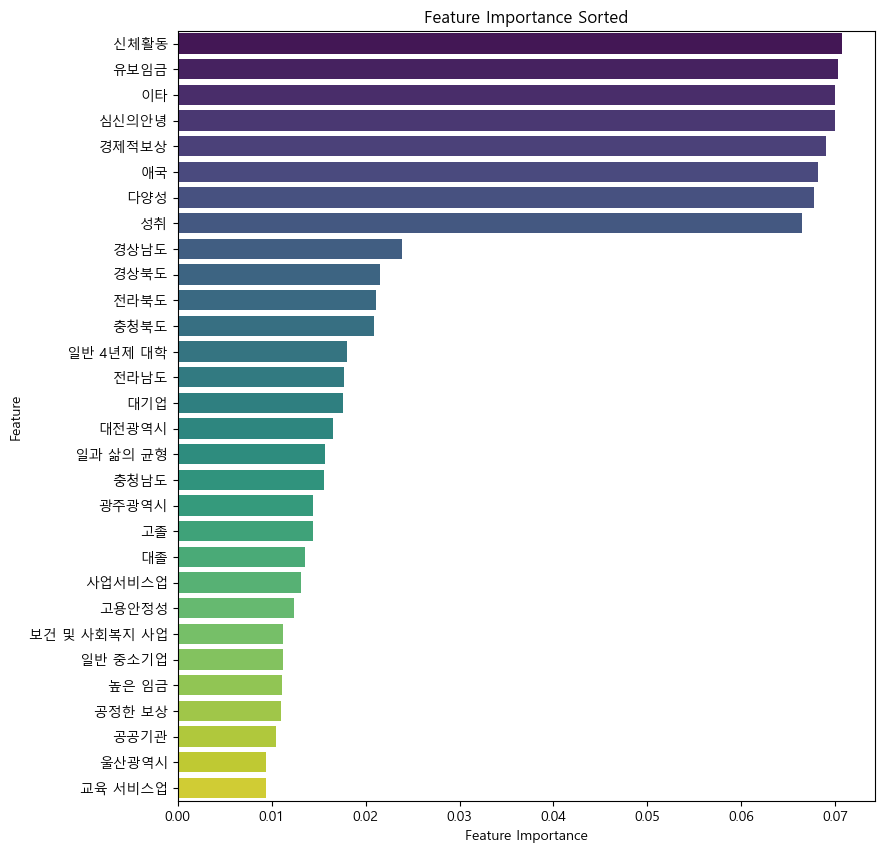

In [46]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})
importance_df = importance_df.sort_values(by='importance', ascending=False).head(30)

plt.figure(figsize=(9, 10))
sns.barplot(x=importance_df['importance'], y=importance_df['feature'], 
#             palette=sns.color_palette("ch:rot=-.25, s=-.25"),
            palette=sns.mpl_palette("viridis", 30),
           )
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Sorted")
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1014
           1       0.71      0.76      0.73      1060

    accuracy                           0.72      2074
   macro avg       0.72      0.72      0.72      2074
weighted avg       0.72      0.72      0.72      2074



Text(96.51909722222221, 0.5, 'True Label')

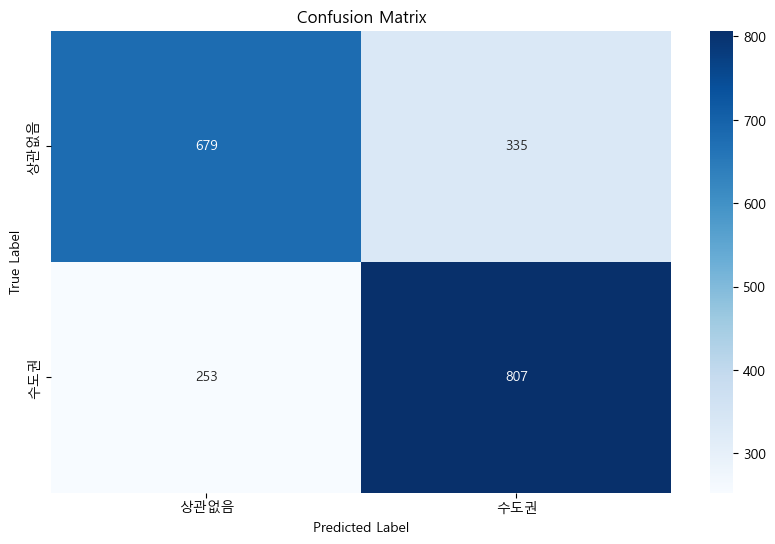

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['상관없음', '수도권'], yticklabels=['상관없음', '수도권'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

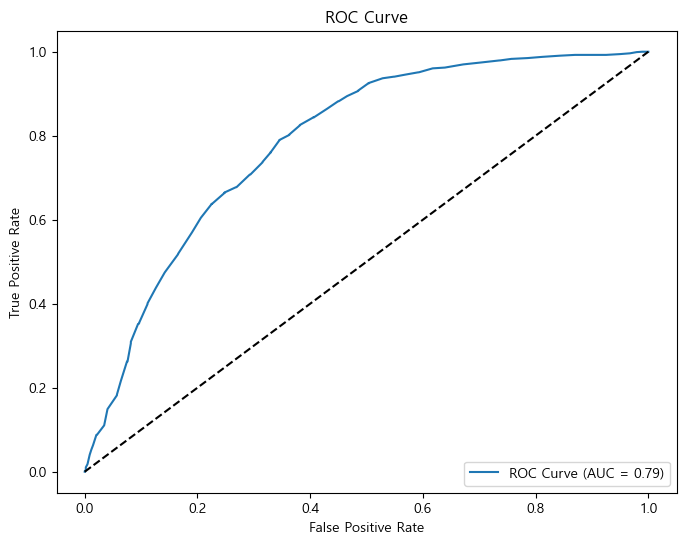

In [49]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(yp_df.loc[y_test.index, '희망지역_encd'], y_prob)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### xgboost

In [87]:
# !pip install xgboost
# !pip install shap

In [50]:
import xgboost as xgb

In [171]:
set_col = [
    '성취', '이타', '신체활동', 
    '다양성', '애국', '경제적보상', '심신의안녕',
#     '인정', '직업안정', '타인영향', '지적추구', '자율', 
    
    '유보임금',
    
    '강원도', '경상남도', '경상북도', '광주광역시', '대전광역시', 
    '세종특별자치시', '울산광역시',
    '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도', 
#     '부산광역시', 
#     '대구광역시', 
#     '서울특별시', '경기도', '인천광역시', 
    
#     '비경제활동인구', '실업자', '취업자', 
    
    '대졸', '전문대졸', '고졸', 
#     '고졸미만', '석사학위이상', 
    
#     '강원', '경남', '경북', '광주', '대구', '대전', '부산', '세종',
#     '울산', '인천', '전남', '전북', '제주', '충남', '충북', 
#     '서울', '경기', 
#     '알수없음', '그외 지역', 
    
#     '대학교', '대학원', 
#     '알수없음', '고등학교', 
    
    '2~3년제 대학', '일반 4년제 대학', 
#     '알수없음',  '기타',
    
    '건설업', '광공업', '교육 서비스업', '금융 및 보험업', '도소매 및 숙박/음식점업', 
    '보건 및 사회복지 사업', '사업서비스업', '오락, 문화 및 운동관련 서비스업', '전기, 가스 및 수도사업', 
#     '상관없다',
#     '기타', '농림어업', 
    
    '공공기관', '대기업', '외국계기업', '일반 중소기업', '전문 중소기업', '창업',
    
    '고용안정성', '공정한 보상', '높은 임금', '복지제도', '수평적이고 자유로운 회사 분위기',
    '일과 삶의 균형', '회사 및 개인의 발전가능성',
#     '직장의 소재지 또는 위치', '회사 네임밸류',
#     '알수없음', '기타', 
          ]

In [172]:
X = yp_combined[set_col]
y = yp_df['희망지역_encd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

idx = y_test.index

In [173]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [174]:
model = xgb.XGBClassifier(
                          # colsample_bytree=0.5,
                          # gamma=0.2,
#                           learning_rate=0.5,
                          # max_depth=9,
                          # min_child_weight=30,
                          n_estimator=50,
                          random_state=42,
#                           reg_alpha=1,
#                           scale_pos_weight=3
                          )

In [175]:
model.fit(X_train, y_train,
          # eval_set=[(x_val, y_val)]
          )

print('Acc:', model.score(X_test, y_test))

Acc: 0.7227579556412729


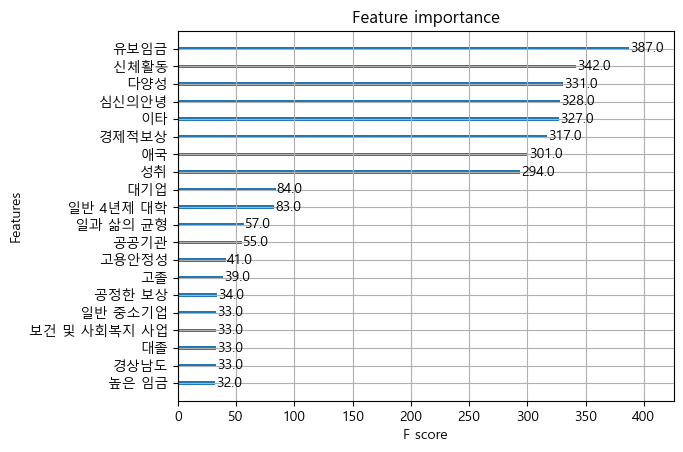

In [178]:
xgb.plot_importance(model, max_num_features=20)
plt.show()

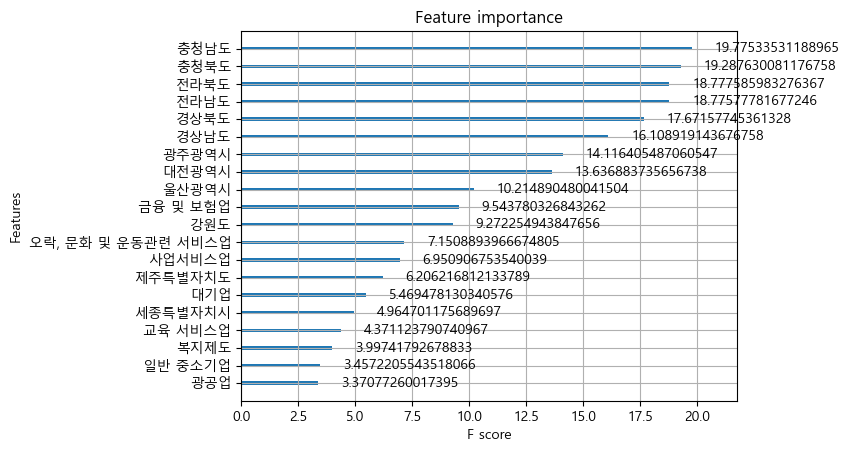

In [176]:
xgb.plot_importance(model, importance_type='gain', max_num_features=20)
plt.show()

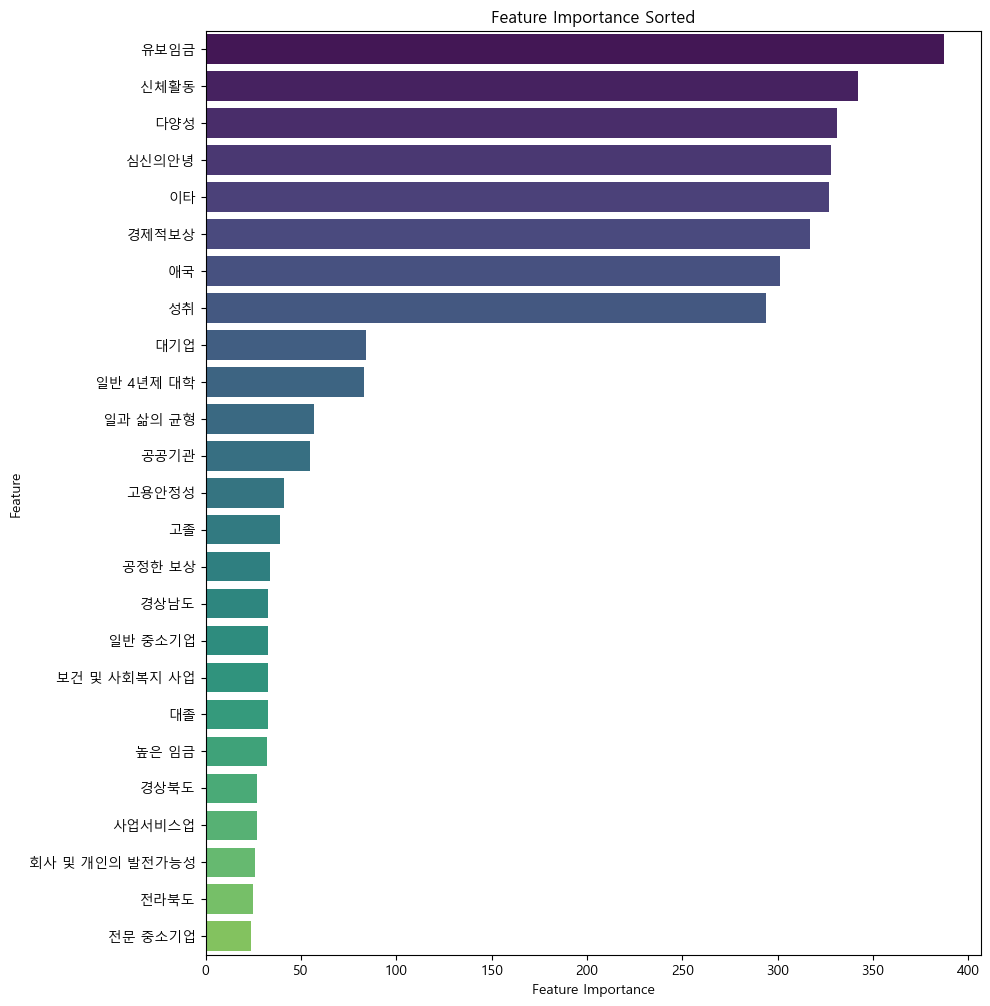

In [201]:
fscore = model.get_booster().get_score(importance_type='weight')  # F-Score
fscore_df = pd.DataFrame({
    'Feature': list(fscore.keys()),
    'F-Score': list(fscore.values())
}).sort_values(by='F-Score', ascending=False)

importance_df = fscore_df.sort_values(by='F-Score', ascending=False).head(25)

plt.figure(figsize=(10, 12))
sns.barplot(x=importance_df['F-Score'], y=importance_df['Feature'], 
#             palette=sns.color_palette("ch:rot=-.25, s=-.25"),
            palette=sns.mpl_palette("viridis", 30),
           )
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Sorted")
plt.show()

In [180]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1014
           1       0.71      0.79      0.74      1060

    accuracy                           0.72      2074
   macro avg       0.73      0.72      0.72      2074
weighted avg       0.73      0.72      0.72      2074



Text(96.51909722222221, 0.5, 'True Label')

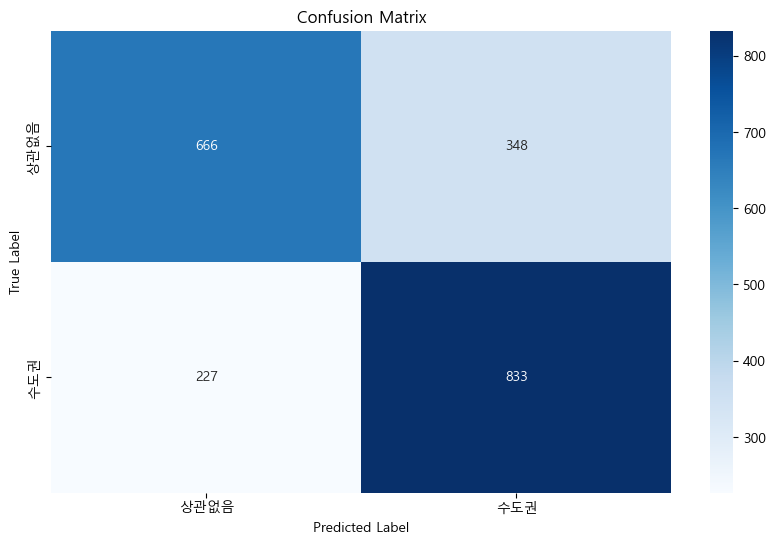

In [181]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['상관없음', '수도권'], yticklabels=['상관없음', '수도권'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

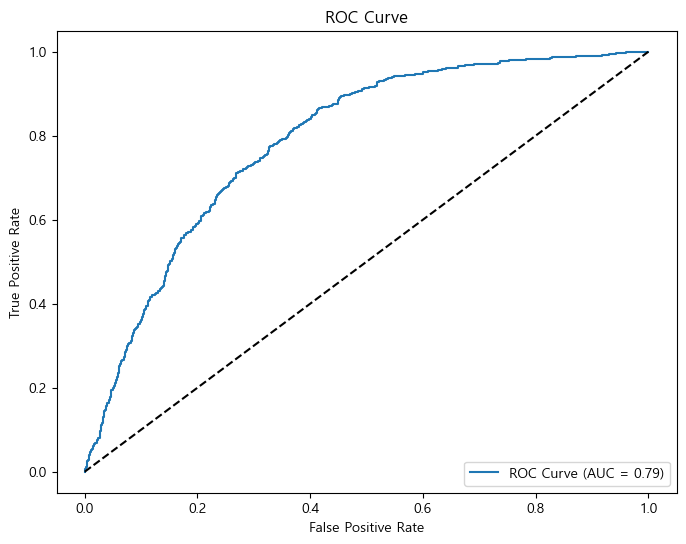

In [182]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(yp_df.loc[idx, '희망지역_encd'], y_prob)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [183]:
import shap

explainer = shap.TreeExplainer(model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_train) # Shap Values 계산

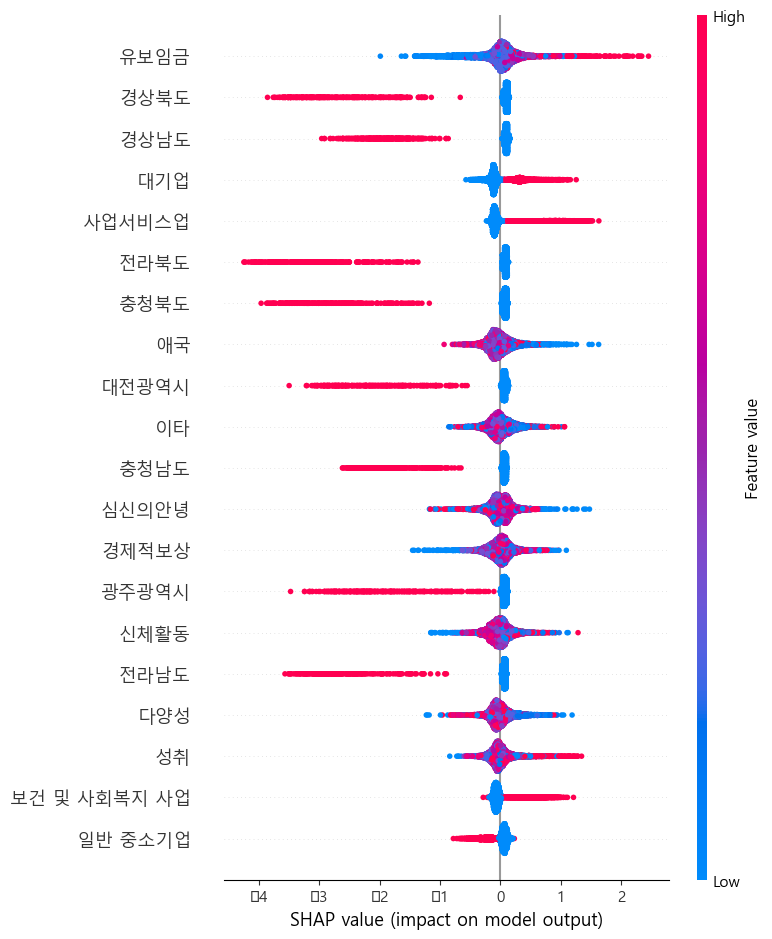

In [204]:
# summary
plt.figure(figsize=(10, 15))
shap.summary_plot(shap_values, X_train)

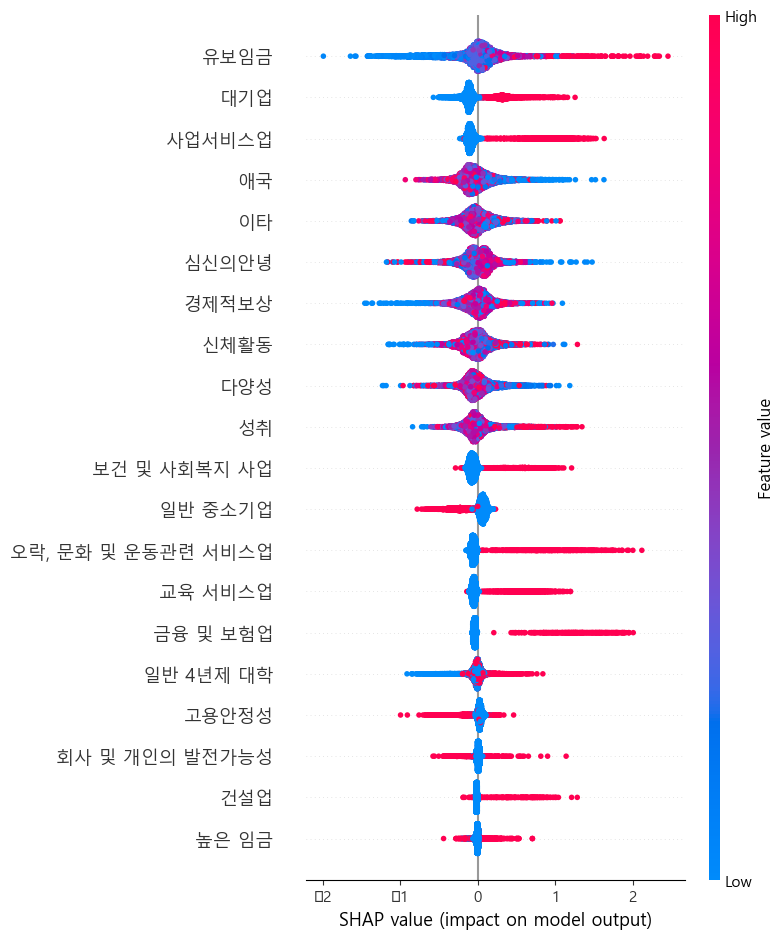

In [209]:
# SHAP 값의 절대값 평균 계산
mean_shap_values = np.abs(shap_values).mean(axis=0)

# 변수 중요도에 따라 사용자 정의 순서 설정 (큰 값부터)
# custom_order = [7, 2, 3, 6, 1, 5, 4, 0, 35, 24, 45, 34, 40, 22, 41, 9, 37, 30, 20, 42, 10, 31, 46, 16, 38]
# custom_order = [7, 2, 3, 6, 1, 5, 4, 0, 35, 24, 45, 34, 40, 22, 41]
custom_order = [0, 1, 2, 3, 4, 5, 6, 7, 40, 41, 42, 44, 46,
                20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                35, 36, 37, 38, 39,
#                 34, 43, 45
               ]

# SHAP 값과 feature 이름을 사용자 정의 순서로 재정렬
shap_values_ordered = shap_values[:, custom_order]
features_ordered = X_train.columns[custom_order]

plt.figure(figsize=(8, 15))
shap.summary_plot(shap_values_ordered, X_train[features_ordered])